In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
cluster1=np.random.uniform(0.5,2.5,(2,10))
cluster2=np.random.uniform(2.5,4.5,(2,10))
X=np.hstack((cluster1,cluster2)).T

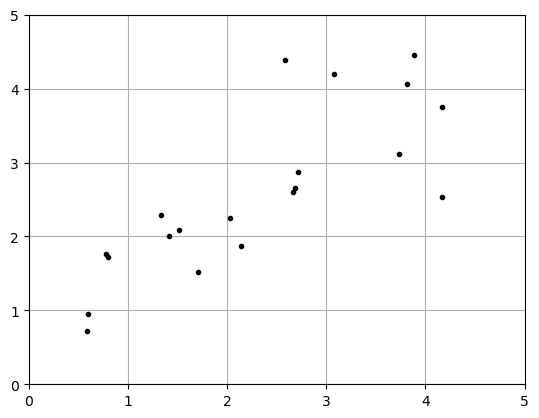

In [3]:
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0]) 
    
series_meandistortions = pd.Series(meandistortions,index=range(1,10))
series_meandistortions     

1    1.438371
2    0.814971
3    0.648950
4    0.516405
5    0.408935
6    0.333054
7    0.253667
8    0.209438
9    0.172927
dtype: float64

In [5]:
pd.Series(series_meandistortions.diff(-1))

1    0.623400
2    0.166021
3    0.132545
4    0.107470
5    0.075881
6    0.079387
7    0.044229
8    0.036511
9         NaN
dtype: float64

In [6]:
print('最大扭曲程度所對應的K值為',pd.Series(series_meandistortions.diff(-1)).idxmax()+1)

最大扭曲程度所對應的K值為 2


In [7]:
pd.Series(series_meandistortions.diff(-1),index=range(2,10))

2    0.166021
3    0.132545
4    0.107470
5    0.075881
6    0.079387
7    0.044229
8    0.036511
9         NaN
dtype: float64

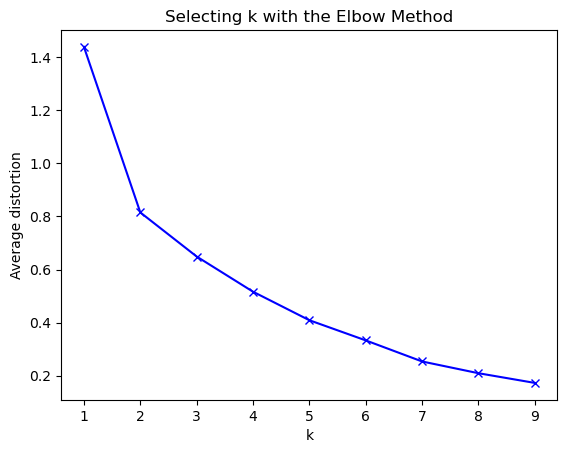

In [8]:
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [9]:
x1 = X[:,0]
x2 = X[:,1]

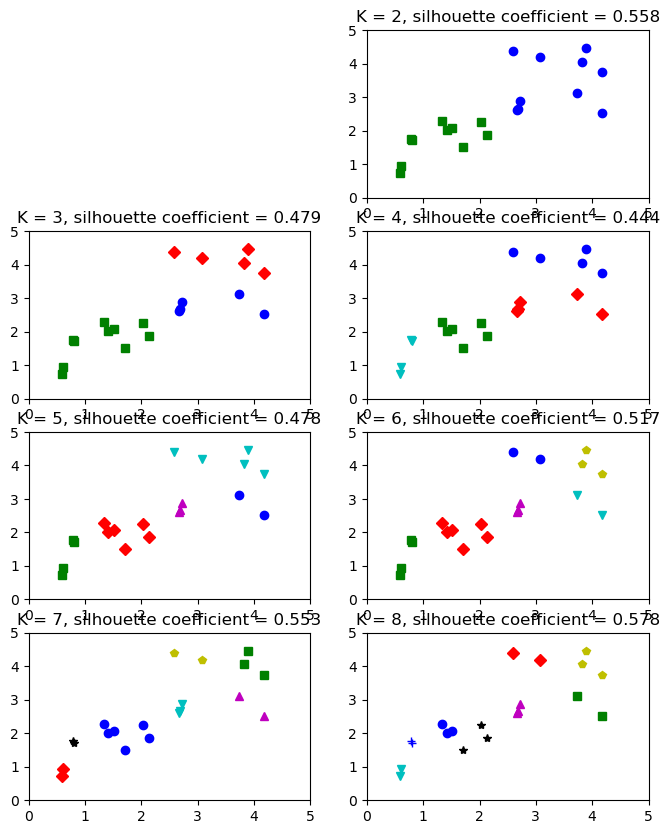

In [10]:
from sklearn import metrics
plt.figure(figsize=(8, 10)) 
plt.subplot(3, 2, 1)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.title('Instances')
plt.scatter(X[:,0], X[:,1])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 6, 7, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(4, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
        plt.xlim([0, 5])
        plt.ylim([0, 5])
        plt.title('K = %s, silhouette coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean')))
        

plt.show()

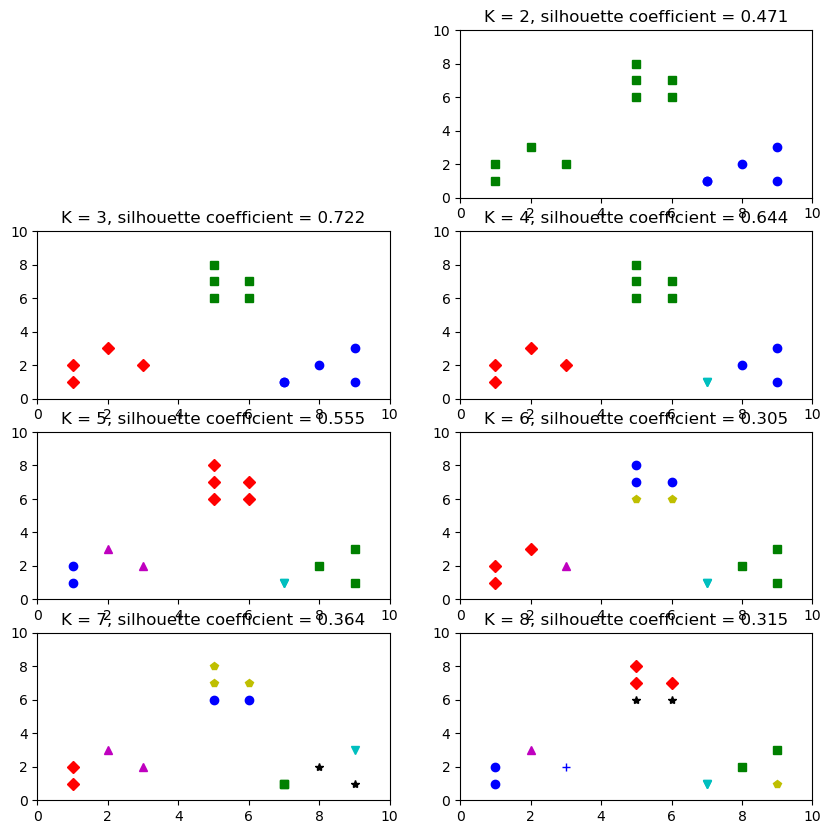

In [11]:
from sklearn import metrics
plt.figure(figsize=(10, 10)) 
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 6, 7, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(4, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, silhouette coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean')))
        

plt.show()